In [2]:
import numpy as np
import pandas as pd 
import pylab as pl
from matplotlib import pyplot as plt #画图
from sklearn.cluster import KMeans 
plt.rcParams['figure.figsize'] = (16,9)
plt.style.use('ggplot')

# clean data

In [3]:
data = pd.read_csv('tbl_reading.csv')
filtered_data = data[(data['numberOfWords']<=6000) & (data['numberOfWords']>=100) & (data['reading_duration']<=2000) &  (data['isRead_wholeArticle'] == 1)&(data['reading_duration']>=10)]


In [4]:
filtered_data.head()

,reading_id,user_id,reading_session,article_id,article_url,reading_duration,isScrollUsed,numberOfWords,isRead_wholeArticle
296,663,32,af81c047-a8fa-450d-9519-bd852433dedd,NaN,http://www.bbc.co.uk/news/world-europe-2909504...,74.0,1,1450,1
300,667,32,af81c047-a8fa-450d-9519-bd852433dedd,NaN,http://www.bbc.co.uk/news/technology-29075417#...,58.0,1,1221,1
310,678,34,bb202893-1438-4141-973f-158095c7162a,NaN,http://www.bbc.co.uk/sport/0/tennis/29096972,10.0,1,1579,1
333,735,40,e12713f5-150d-49a4-97d8-80db758d295d,NaN,29126854,55.0,1,1757,1
336,738,40,6c0af4ff-5e8f-42b6-ab99-e6e32a7d8c58,NaN,29125207,26.0,1,1158,1


In [5]:
print(filtered_data.shape)

(199, 9)


(199,)
(199,)
(199, 2)


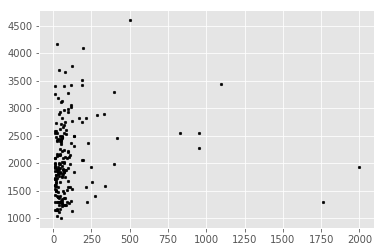

In [6]:
f1 = filtered_data['reading_duration'].values
print(f1.shape)
f2= filtered_data['numberOfWords'].values
print(f2.shape)
X = np.array(list(zip(f1,f2)))
print(X.shape)
plt.scatter(f1,f2, c='black', s=7)
#filter data 1.filtered() 2.sql 

In [11]:
#num of clusters 
k = 5 
kmeans = KMeans(n_clusters=k)

kmeans = kmeans.fit(X) #search in web
labels = kmeans.predict(X)
print(len(labels))
print(len(X))
print(len(filtered_data))
centroids = kmeans.cluster_centers_
print(centroids) # five centres's coordiantion



199
199
199
[[  62.94827586 1353.55172414]
 [  64.17142857 1930.5       ]
 [ 182.38888889 3543.66666667]
 [ 140.52941176 2607.58823529]
 [1880.         1613.5       ]]


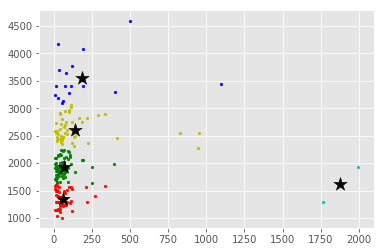

In [12]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if labels[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=200, c='#050505') #five centres drawn by makers 

#  收敛 什么时候我能够找到最有结果
有时候dont work out 
根据点的 initila postion 不同， 得到的收敛不一样

我们选几个点 是最好的 
定义k
sklearn -》 一般来讲 可以找到一个很好的值  3-6 normal 

我分成三的时候怎么样确认 比 5好 
看他们到中心的距离是多少



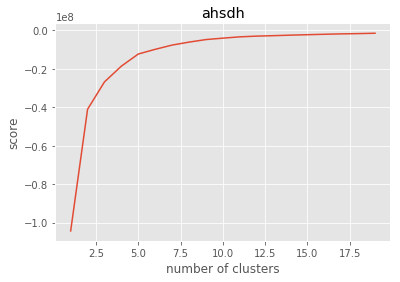

In [9]:
# 一个用来算最优 收敛的 算法 
Nc = range(1,20)
kmeans = [KMeans(n_clusters = i) for i in Nc] 
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
pl.plot(Nc, score)
pl.xlabel('number of clusters')
pl.ylabel('score')
pl.title('ahsdh')
pl.show()


这里看 斜率最大的点 

In [13]:
filtered_data['labels'] = labels
filtered_data
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
#   print(filtered_data)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,reading_id,user_id,reading_session,article_id,article_url,reading_duration,isScrollUsed,numberOfWords,isRead_wholeArticle,labels
296,663,32,af81c047-a8fa-450d-9519-bd852433dedd,NaN,http://www.bbc.co.uk/news/world-europe-2909504...,74.0,1,1450,1,0
300,667,32,af81c047-a8fa-450d-9519-bd852433dedd,NaN,http://www.bbc.co.uk/news/technology-29075417#...,58.0,1,1221,1,0
310,678,34,bb202893-1438-4141-973f-158095c7162a,NaN,http://www.bbc.co.uk/sport/0/tennis/29096972,10.0,1,1579,1,0
333,735,40,e12713f5-150d-49a4-97d8-80db758d295d,NaN,29126854,55.0,1,1757,1,1
336,738,40,6c0af4ff-5e8f-42b6-ab99-e6e32a7d8c58,NaN,29125207,26.0,1,1158,1,0
340,742,8,4aa0b916-daf2-4e82-91a2-35b8219f9207,NaN,29126854,95.0,1,1665,1,1
344,746,8,6dcb3425-d01d-4fa8-8244-977a97e3c9ae,NaN,29125210,48.0,1,1286,1,0
359,761,6,5b206a3a-2e8b-4401-b1dd-c71464b5f6de,NaN,29149536,38.0,1,1228,1,0
360,762,6,5b206a3a-2e8b-4401-b1dd-c71464b5f6de,NaN,29146961,248.0,1,1929,1,1
373,775,4,f2418f27-49f6-4de3-9e2f-191834dbe462,NaN,29142830,105.0,1,1277,1,0


python. syntax 
numpy
sklearn  



pca
matplotlib
pylab